In [54]:
using Plots

# Supplemental program 5.1

# ----------------------------------------
# Calculate and graph thermal conductivity
# ----------------------------------------

cwat = 4188;               # Specific heat of water (J/kg/K)
cice = 2117.27;            # Specific heat ice (J/kg/K)

rho_wat = 1000;            # Density of water (kg/m3)
rho_ice = 917;             # Density of ice (kg/m3)

cvwat = cwat * rho_wat;    # Heat capacity of water (J/m3/K)
cvice = cice * rho_ice;    # Heat capacity of ice (J/m3/K)
cvsol = 1.926e06;          # Heat capacity of soil solids (J/m3/K)

tkwat = 0.57;              # Thermal conductivity of water (W/m/K)
tkice = 2.29;              # Thermal conductivity of ice (W/m/K)
tk_quartz = 7.7;           # Thermal conductivity of quartz (W/m/K)


In [34]:
# Soil texture classes (Cosby et al. 1984. Water Resources Research 20:682-690)

#  1: sand
#  2: loamy sand
#  3: sandy loam
#  4: silty loam
#  5: loam
#  6: sandy clay loam
#  7  silty clay loam
#  8: clay loam
#  9: sandy clay
# 10: silty clay
# 11: clay

silt = [ 5, 12, 32, 70, 39, 15, 56, 34,  6, 47, 20];       # Percent silt
sand = [92, 82, 58, 17, 43, 58, 10, 32, 52,  6, 22];       # Percent sand
clay = [ 3,  6, 10, 13, 18, 27, 34, 34, 42, 47, 58];       # Percent clay

# Volumetric soil water content at saturation (porosity)
# (Clapp and Hornberger. 1978. Water Resources Research 14:601-604)

watsat = [0.395, 0.410, 0.435, 0.485, 0.451, 0.420, 0.477, 0.476, 0.426, 0.492, 0.482];

# Define 5 soil types to process

soiltyp = [1, 3, 5, 8, 11];

In [35]:
# Set relative soil water content (s) from 0 to 1

inc = 0.05;                             # increment
n = (1 - 0) / inc + 1;                  # number of values
# s = linspace(0,1,n);                    # n evenly spaced values between 0 and 1 (inclusive)
s = range(0,1,length=21)

# tk1 = Array{Float64,2}(undef, 1,21)
# cv1 = Array{Float64,2}(undef, 1,21)
tk1 = Any[]
cv1 = Any[]

tk2 = Any[]
cv2 = Any[]

tk3 = Any[]
cv3 = Any[]

tk4 = Any[]
cv4 = Any[]

tk5 = Any[]
cv5 = Any[]



0-element Array{Any,1}

In [36]:

# Loop through each soil type

for i = 1:5 #length(soiltyp)

   # Soil texture to process

   k = soiltyp[i];

   # Thermal conductivity and heat capacity for each soil moisture

   for j = 1:length(s)

      # Volumetric water content

      h2osoi = s[j] * watsat[k];

      # Dry thermal conductivity (W/m/K) from bulk density (kg/m3)

      bd = 2700 * (1 - watsat[k]);
      tkdry = (0.135 * bd + 64.7) / (2700 - 0.947 * bd);

      # Soil solids thermal conducitivty (W/m/K) from quartz fraction
      # tko = thermal conductivity of other minerals (W/m/K)

      quartz = sand[k] / 100;
      if (quartz > 0.2)
         tko = 2.0;
      else
         tko = 3.0;
      end
      tksol = (tk_quartz^quartz) * (tko^(1-quartz));

      # Unfrozen and frozen saturated thermal conductivity (W/m/K)

      tksat_u = (tksol^(1-watsat[k])) * (tkwat^watsat[k]);
      tksat_f = (tksol^(1-watsat[k])) * (tkice^watsat[k]);

      # Unfrozen and frozen Kersten number

      if (sand[k] < 50)
         ke_u = log10(max(s[j],0.1)) + 1;
      else
         ke_u = 0.7 * log10(max(s[j],0.05)) + 1;
      end
      ke_f = s[j];

      # Unfrozen and frozen thermal conductivity (W/m/K)

      tku = (tksat_u - tkdry) * ke_u + tkdry;
      tkf = (tksat_f - tkdry) * ke_f + tkdry;

      # Unfrozen and frozen heat capacity (J/m3/K)

      cvu = (1 - watsat[k]) * cvsol + cvwat * h2osoi;
      cvf = (1 - watsat[k]) * cvsol + cvice * h2osoi;

      # Save values for each texture type

      if (i == 1)
         #tk1[j] = tku;
         #cv1[j] = cvu * 1e-06;
            push!(tk1,tku)
            push!(cv1,cvu * 1e-06)
      elseif (i == 2)
         #tk2[j] = tku;
         #cv2[j] = cvu * 1e-06;
            push!(tk2,tku)
            push!(cv2,cvu * 1e-06)
      elseif (i == 3)
         #tk3[j] = tku;
         #cv3[j] = cvu * 1e-06;
            push!(tk3,tku)
            push!(cv3,cvu * 1e-06)
      elseif (i == 4)
         #tk4[j] = tku;
         #cv4[j] = cvu * 1e-06;
            push!(tk4,tku)
            push!(cv4,cvu * 1e-06)   
      elseif (i == 5)
         #tk5[j] = tku;
         #cv5[j] = cvu * 1e-06;
            push!(tk5,tku)
            push!(cv5,cvu * 1e-06)
      end

   end      # end soil water loop j
end         # end soil type loop i


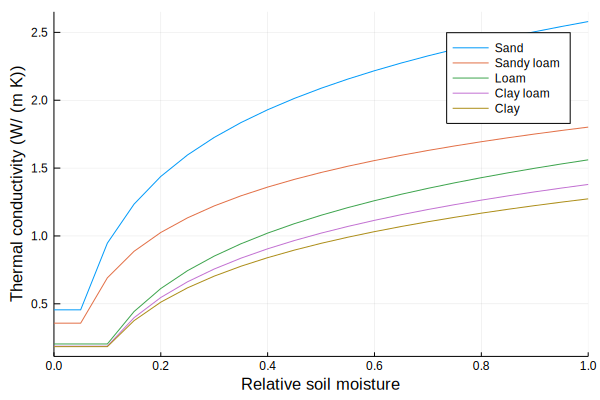

In [47]:
plot(s, tk1, ylabel="Thermal conductivity (W/ (m K))", xlabel="Relative soil moisture", xlimit=(0,1), yticks=0:0.5:3 , label="Sand")
plot!(s, tk2 , label="Sandy loam")
plot!(s, tk3 , label="Loam")
plot!(s, tk4 , label="Clay loam")
plot!(s, tk5 , label="Clay")


In [52]:
ThermConduc = [s; tk1; tk2; tk3; tk4; tk5]

126-element Array{Any,1}:
 0.0               
 0.05              
 0.1               
 0.15              
 0.2               
 0.25              
 0.3               
 0.35              
 0.4               
 0.45              
 0.5               
 0.55              
 0.6               
 ⋮                 
 0.8957514566260882
 0.9455884997996786
 0.990671589191696 
 1.031829225186083 
 1.0696905801078098
 1.1047447195515352
 1.1373793426216414
 1.1679069937460778
 1.196583314054347 
 1.2236200680080458
 1.2491946433022076
 1.2734571111816362

In [53]:
HeatCapac = [s; cv1; cv2; cv3; cv4; cv5]

126-element Array{Any,1}:
 0.0               
 0.05              
 0.1               
 0.15              
 0.2               
 0.25              
 0.3               
 0.35              
 0.4               
 0.45              
 0.5               
 0.55              
 0.6               
 ⋮                 
 1.9060452         
 2.006976          
 2.1079068         
 2.2088375999999994
 2.3097684000000003
 2.4106992000000003
 2.51163           
 2.6125608         
 2.7134915999999993
 2.8144224         
 2.9153532         
 3.0162839999999997